## Librerías :

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import cv2 as cv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tqdm import tqdm
%matplotlib inline

## Data Analysis:


In [2]:
classes={0:'Safe Driving'
         ,1:'texting - right'
         ,2:'talking on the phone - right'
         ,3:'texting - left'
         ,4:'talking on the phone - left'
         ,5:'operating the radio'
         ,6:'drinking'
         ,7:'reaching behind'
         ,8:'hair and makeup'
         ,9:'talking to passenger'}

In [3]:
data1 = pd.read_csv('../files/driver_imgs_list.csv')

for j in np.unique(data1["classname"]):
    print "clase :",j,"Numero de ejemplares:",np.count_nonzero(data1["classname"][data1.classname==j])

clase : c0 Numero de ejemplares: 2489
clase : c1 Numero de ejemplares: 2267
clase : c2 Numero de ejemplares: 2317
clase : c3 Numero de ejemplares: 2346
clase : c4 Numero de ejemplares: 2326
clase : c5 Numero de ejemplares: 2312
clase : c6 Numero de ejemplares: 2325
clase : c7 Numero de ejemplares: 2002
clase : c8 Numero de ejemplares: 1911
clase : c9 Numero de ejemplares: 2129


In [4]:
path_test_images='../../datasets/driver-detections/test/'
path_images='../../datasets/driver-detections/train/'
test_images_names=os.listdir(path_test_images)
print("Numero Ejemplares Test:",len(test_images_names))

('Numero Ejemplares Test:', 79726)


In [8]:
data1.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [9]:
imagen=cv.cvtColor(cv.imread(path_test_images+random.choice(test_images_names)), cv.COLOR_BGR2RGB)
print "Las dimensiones de cada imagen son de:",imagen.shape

Las dimensiones de cada imagen son de: (480, 640, 3)


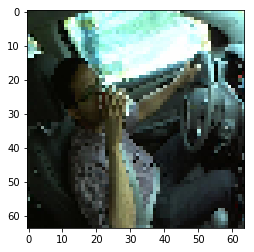

In [10]:
imagen2=cv.resize(imagen,(64,64),interpolation = cv.INTER_CUBIC)
plt.imshow(imagen2)

## Dataset Creation:

In [7]:
size=300
X_train=[]
y_train=[]
for i in tqdm(np.unique(data1["classname"])):
    for j in np.random.choice(data1["img"][data1.classname==i],size):
    #for j in data1["img"][data1.classname==i]:
        temp_image=cv.cvtColor(cv.imread(path_images+i+"/"+j), cv.COLOR_BGR2RGB)
        X_train.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
        y_train.append(int(i[-1]))
        
c = list(zip(X_train, y_train))

random.shuffle(c)

X_train,y_train = zip(*c)   

X_train=np.array(X_train)
y_train=np.array(y_train)

X_train = X_train.astype('float32')
X_train /= 255




  0%|          | 0/10 [00:00<?, ?it/s]
Exception in thread Thread-5:
Traceback (most recent call last):
  File "/opt/miniconda/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/opt/miniconda/lib/python2.7/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/opt/miniconda/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration


100%|██████████| 10/10 [02:16<00:00, 13.61s/it]


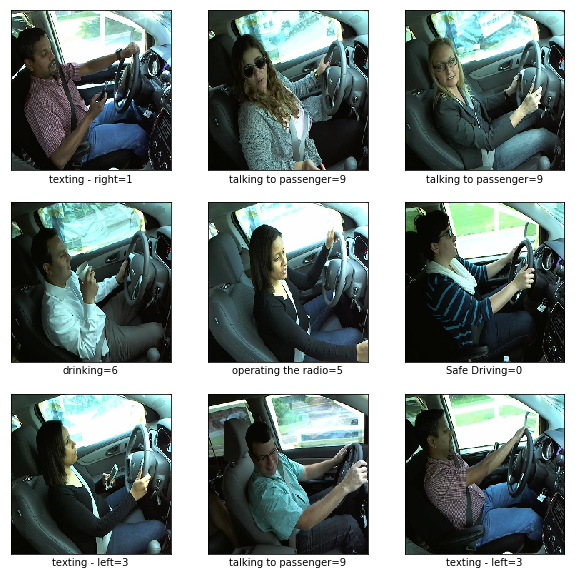

In [172]:

plt.figure(figsize=(10,10))
for i,j in enumerate(np.random.randint(0,500,9)):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[j],cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[j]]+"="+str(y_train[j]))

## Creating Convolutional Neuronal Network

In [9]:
model_CNN =  keras.models.Sequential()
model_CNN.add(keras.layers.Conv2D(20, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(64, 64, 3)))
model_CNN.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(keras.layers.Conv2D(50, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model_CNN.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(500, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(keras.layers.Dense(10, activation='softmax'))

model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 20)        1520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total para

In [10]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#loss:categorical_crossentropy if we have y with one hot encoding 


In [12]:
history = model_CNN.fit(X_train,y_train, epochs=10, batch_size=60)

Epoch 1/10
3000/3000 [==============================] - 42s - loss: 0.3116 - acc: 0.9290    
Epoch 2/10
3000/3000 [==============================] - 42s - loss: 0.2551 - acc: 0.9453    
Epoch 3/10
3000/3000 [==============================] - 45s - loss: 0.2149 - acc: 0.9567    
Epoch 4/10
3000/3000 [==============================] - 40s - loss: 0.1711 - acc: 0.9683    
Epoch 5/10
3000/3000 [==============================] - 43s - loss: 0.1428 - acc: 0.9770    
Epoch 6/10
3000/3000 [==============================] - 38s - loss: 0.1152 - acc: 0.9823    
Epoch 7/10
3000/3000 [==============================] - 38s - loss: 0.1067 - acc: 0.9837    
Epoch 8/10
3000/3000 [==============================] - 43s - loss: 0.0853 - acc: 0.9897    
Epoch 9/10
3000/3000 [==============================] - 40s - loss: 0.0749 - acc: 0.9930    
Epoch 10/10
3000/3000 [==============================] - 42s - loss: 0.0663 - acc: 0.9933    


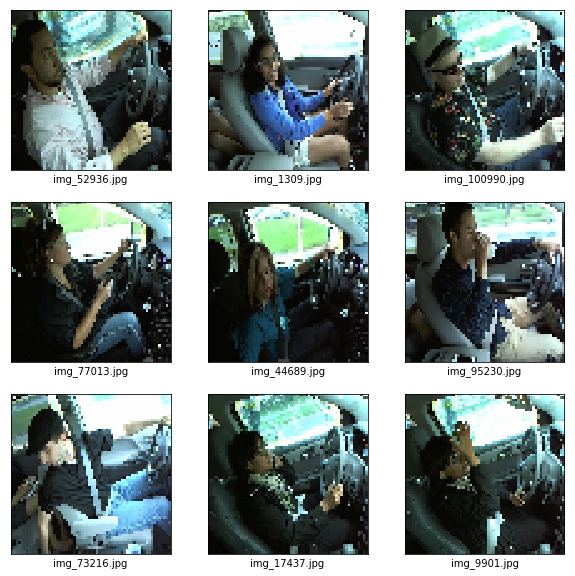

In [15]:
X_test=[]
test_images=np.random.choice(test_images_names,9)
for i in test_images:
    temp_image=cv.cvtColor(cv.imread(path_test_images+i), cv.COLOR_BGR2RGB)
    X_test.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
    
X_test=np.array(X_test)
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.xlabel(test_images[i])

In [16]:

X_test = X_test.astype('float32')
X_test/= 255

prediccion=model_CNN.predict(X_test)
for i in range(len(X_test)):
    print "valor predicho:",  np.argmax(prediccion[i]), " clase: ", classes[np.argmax(prediccion[i])]


valor predicho: 9  clase:  talking to passenger
valor predicho: 9  clase:  talking to passenger
valor predicho: 5  clase:  operating the radio
valor predicho: 1  clase:  texting - right
valor predicho: 7  clase:  reaching behind
valor predicho: 6  clase:  drinking
valor predicho: 7  clase:  reaching behind
valor predicho: 4  clase:  talking on the phone - left
valor predicho: 8  clase:  hair and makeup
